# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip drive/MyDrive/Colab\ Notebooks/kaggle.zip

Archive:  drive/MyDrive/Colab Notebooks/kaggle.zip
  inflating: creditcard.csv          


In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


***Все фичи непрерывны и без пропусков. Уже обработаны с помощью PCA до нас*** 

In [10]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Супер дизбалансный датасет, так что простым Accuracy не обойтись

In [50]:
from sklearn.model_selection import train_test_split

X, y = data.drop('Class', axis=1), data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=data['Class'])

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [12]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score

In [13]:
model_types = {'log_reg': LogisticRegression, 'ridge': RidgeClassifier, 'knn': KNeighborsClassifier, 
               'tree': DecisionTreeClassifier, 'forest': RandomForestClassifier, 'boosting': GradientBoostingClassifier}

metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 
           'f1': f1_score, 'roc_auc': roc_auc_score}

results = pd.DataFrame(np.zeros((len(metrics), len(model_types))), columns=model_types.keys(), index=metrics.keys())
results.head()

,log_reg,ridge,knn,tree,forest,boosting
accuracy,0.0,0.0,0.0,0.0,0.0,0.0
precision,0.0,0.0,0.0,0.0,0.0,0.0
recall,0.0,0.0,0.0,0.0,0.0,0.0
f1,0.0,0.0,0.0,0.0,0.0,0.0
roc_auc,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
from tqdm import tqdm

***Давайте сначала обучим все модели без тюнинга параметров и/или нормализации/стандартизации датасета и посмотрим, какие метрики они дадут таким образом***

Works quite long time*

In [15]:
for model_name, model_type in tqdm(model_types.items()):
  model = model_type().fit(X_train, y_train)
  preds = model.predict(X_test)
  for metric_name, metric in tqdm(metrics.items()):
    model_result = metric(y_test, preds)
    results.loc[metric_name, model_name] = model_result

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,

100%|██████████| 6/6 [06:36<00:00, 66.01s/it]


In [16]:
results

,log_reg,ridge,knn,tree,forest,boosting
accuracy,0.998767,0.998854,0.998293,0.998854,0.999451,0.999328
precision,0.674923,0.841026,1.000000,0.654292,0.924290,0.861862
recall,0.553299,0.416244,0.012690,0.715736,0.743655,0.728426
f1,0.608089,0.556876,0.025063,0.683636,0.824191,0.789546
roc_auc,0.776419,0.708054,0.506345,0.857540,0.871775,0.864112


Люблю, как выглядят такие таблички))

Небольшие выводы:

Видно, что Accuracy у всех превосходный (не стоит обольщаться при таком дизбалансе)

KNN работает очень плохо (и медленно)

Регрессии показывают себя очень достойно (захотелось посмотреть, насколько пространство линейно-разделимо)

Boosting проседает))

roc_auc хорош у всех

Забыл про константу...

In [ ]:
class ConstantClassifier:
  def __init__(self, const):
    self.prediction = const
  def fit(self):
    pass
  def predict(self, X):
    return [self.prediction for _ in range(X.shape[0])]

In [ ]:
constmodel = ConstantClassifier(const=0)
for metric_name, metric in metrics.items():
  print(f'{metric_name}: {metric(y, constmodel.predict(X))}')

accuracy: 0.9982725143693799


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: 0.0
recall: 0.0
f1: 0.0
roc_auc: 0.5


Accuracy ~ 1 --> в прод!

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Так как в данных сильный дизбаланс в пользу лейбла "0", а нам важно научиться отлавливать фрод, то считаю логичным оптимизировать recall

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

# Work with Tree

In [51]:
params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [10, 20, 30], 
          'min_samples_leaf': [5, 10, 15]}

grid = GridSearchCV(DecisionTreeClassifier(), params, scoring='recall', n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='recall')

In [52]:
tree_res = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

Сложно визуализировать это в 4-мерном пространстве (можно ли, ахах), поэтому просто покажу динамику изменения scor'а по итерациям

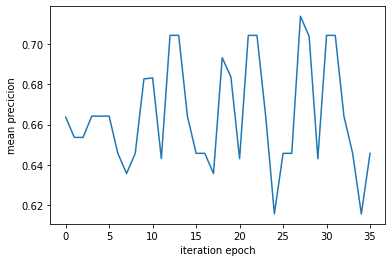

In [53]:
plt.plot(range(36), tree_res['mean_test_score'])
plt.ylabel('mean precicion')
plt.xlabel('iteration epoch')
None

In [54]:
tree_res.sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
27,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.713684,1
30,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.704211,2
21,"{'max_depth': 7, 'min_samples_leaf': 10, 'min_...",0.704211,2
13,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.704211,2
31,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.704211,2


In [55]:
best_tree = grid.best_estimator_
best_tree.fit(X_train, y_train)
preds = best_tree.predict(X_test)

print(f'Recall with the "best" tree: {recall_score(y_test, preds)}')

Recall with the "best" tree: 0.6878172588832487


Поганенько))

# Work with RidgeClassifier

Оформим это дело в функции

In [56]:
def get_results(model, params):
  grid = GridSearchCV(model, params, scoring='recall', n_jobs=-1, cv=5)
  grid.fit(X_train, y_train)
  results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
  return grid.best_estimator_, results

In [57]:
def show_plot(results):
  plt.plot(range(results['mean_test_score'].size), results['mean_test_score'])
  plt.ylabel('mean recall')
  plt.xlabel('iteration epoch')
  None

In [58]:
def get_recall(best_est):
  best_est.fit(X_train, y_train)
  preds = best_est.predict(X_test)
  return recall_score(y_test, preds)

In [59]:
params = {'alpha': np.linspace(0.1, 5, 20)}
best_ridge, ridge_results = get_results(RidgeClassifier(), params)

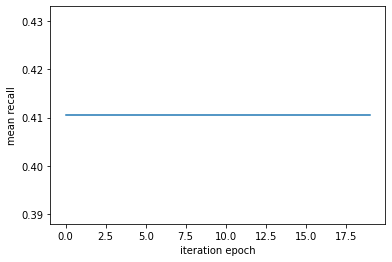

In [60]:
show_plot(ridge_results)

In [61]:
get_recall(best_ridge)

0.4873096446700508

Неожиданно. Неприятно)

# Погоняем RandomForest

In [62]:
params = {'n_estimators': [100, 250, 500]}
best_forest, forest_results = get_results(RandomForestClassifier(), params)

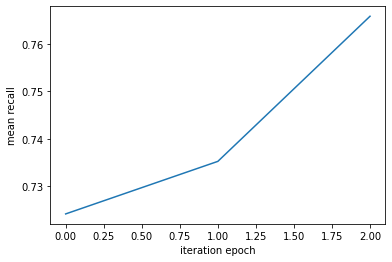

In [63]:
show_plot(forest_results)

Not bad

Но что-то настолько долго перебирал параметры, что я не стал проверять более широкую сетку

In [66]:
get_recall(best_forest)

0.7639593908629442

Not bad)

Подняли выше 0.75 после незначительного тюнинга)

# Метро Люблино, работаем с KNN (а так не хочется)

In [ ]:
params = {'n_neighbors': [5, 10, 20]}
best_knn, knn_results = get_results(KNeighborsClassifier(), params)

In [ ]:
show_plot(knn_results)

In [ ]:
get_recall(best_knn)

smth went wrong...

окей, не очень хотелось)))

# Не стал пока трогать бустинг с перебором гиперпараметров, потому что это потребовало бы кучи времени)

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [17]:
! unzip drive/MyDrive/Colab\ Notebooks/plates_data.zip

Archive:  drive/MyDrive/Colab Notebooks/plates_data.zip
  inflating: Faults.txt              
  inflating: Faults27x7_var.txt      
  inflating: stell-faults.csv        


In [18]:
plates_data = pd.read_csv('stell-faults.csv')

In [19]:
plates_data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


Первые 27 колонок -- фичи

Последние 7 -- тип брака

In [20]:
deffect_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [21]:
plates_data[deffect_types].mean()

Pastry          0.081401
Z_Scratch       0.097888
K_Scatch        0.201443
Stains          0.037094
Dirtiness       0.028336
Bumps           0.207110
Other_Faults    0.346728
dtype: float64

Не особо сбалансированно

In [22]:
plates_data[deffect_types].mean().sum()

1.0

In [23]:
plates_data.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

Шикоз

In [24]:
plates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

Хитрым образом заведем одну единственную фичу с типом брака

Сохраним соответствие лейбла названию отдельно и выкинем их из датасета

In [25]:
labels = np.array([0, 1, 2, 3, 4, 5, 6])
plates_data['deffect'] = plates_data[deffect_types].dot(labels)

In [26]:
label_to_deffect = {name: number for name, number in zip(deffect_types, labels)}

In [27]:
plates_data = plates_data.drop(deffect_types, axis=1)

In [28]:
plates_data.nunique()

X_Minimum                 962
X_Maximum                 994
Y_Minimum                1939
Y_Maximum                1940
Pixels_Areas              920
X_Perimeter               399
Y_Perimeter               317
Sum_of_Luminosity        1909
Minimum_of_Luminosity     161
Maximum_of_Luminosity     100
Length_of_Conveyer         84
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      24
Edges_Index              1387
Empty_Index              1338
Square_Index              770
Outside_X_Index           454
Edges_X_Index             818
Edges_Y_Index             648
Outside_Global_Index        3
LogOfAreas                914
Log_X_Index               183
Log_Y_Index               217
Orientation_Index         918
Luminosity_Index         1522
SigmoidOfAreas            388
deffect                     7
dtype: int64

Заметим, что у нас есть две взаимооднозанчные фичи: TypeOfSteel_A300 и TypeOfSteel_A400

In [29]:
plates_data[['TypeOfSteel_A300', 'TypeOfSteel_A400']].mean().sum()

1.0

In [30]:
(plates_data['TypeOfSteel_A300'] == plates_data['TypeOfSteel_A400']).sum()

0

In [31]:
plates_data = plates_data.drop('TypeOfSteel_A300', axis=1)
plates_data = plates_data.rename(columns={'TypeOfSteel_A400': 'TypeOfSteel'})

Еще есть одна категориальная фича Outside_Global_Index

In [32]:
plates_data['Outside_Global_Index'].unique()

array([1. , 0.5, 0. ])

In [33]:
cat_features = ['Outside_Global_Index', 'TypeOfSteel']
target = 'deffect'
num_features = [feature for feature in list(plates_data) if feature not in cat_features and feature != target]

In [34]:
plates_data = pd.concat([plates_data, pd.get_dummies(plates_data['Outside_Global_Index'], prefix='Outside_Global_Index')], axis=1)

In [35]:
plates_data = plates_data.drop('Outside_Global_Index', axis=1)

In [36]:
cat_features = ['Outside_Global_Index_0.0', 'Outside_Global_Index_0.5', 'Outside_Global_Index_1.0', 'TypeOfSteel']

In [67]:
X, y = plates_data.drop('deffect', axis=1), plates_data['deffect']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

Наивный алгоритм:

In [38]:
from collections import Counter

In [39]:
a = [1, 1, 2, 2, 2]
Counter(a).most_common(1)[0][0]

2

In [40]:
from collections import Counter

class ConstantClassifier:
  def __init__(self):
    self.counter = Counter
  def fit(self, X_train, y_train):
    self.quantities = self.counter(y)
  def predict(self, X_test):
    return list(self.quantities.most_common(1)[0][0] for _ in range (X_test.shape[0]))

In [41]:
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

model_types = {'log_reg': LogisticRegression, 'ridge': RidgeClassifier, 'knn': KNeighborsClassifier, 
               'tree': DecisionTreeClassifier, 'forest': RandomForestClassifier, 'boosting': GradientBoostingClassifier}

Убрал из метрик roc_auc, ибо он только для бинарной классификации

Для prec/rec и f1 поставим усреднение по macro, так как у нас тут дизбаланс классов

In [42]:
constmodel = ConstantClassifier()
constmodel.fit(X_train, y_train)
preds = constmodel.predict(X_test)
for metric_name, metric in metrics.items():
  if metric_name == 'accuracy':
    print(f'{metric_name}: {metric(y_test, preds)}')
  else:
    print(f'{metric_name}: {metric(y_test, preds, average="macro")}')

accuracy: 0.34704370179948585
precision: 0.04957767168564083
recall: 0.14285714285714285
f1: 0.07360959651035988


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


По классике

In [43]:
results = pd.DataFrame(np.zeros((len(metrics), len(model_types))), columns=model_types.keys(), index=metrics.keys())
results.head()

,log_reg,ridge,knn,tree,forest,boosting
accuracy,0.0,0.0,0.0,0.0,0.0,0.0
precision,0.0,0.0,0.0,0.0,0.0,0.0
recall,0.0,0.0,0.0,0.0,0.0,0.0
f1,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
for model_name, model_type in tqdm(model_types.items()):
  model = model_type().fit(X_train, y_train)
  preds = model.predict(X_test)
  for metric_name, metric in tqdm(metrics.items()):
    if metric_name == "accuracy":
      model_result = metric(y_test, preds)
    else:
      model_result = metric(y_test, preds, average='macro')
    results.loc[metric_name, model_name] = model_result

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 17%|█▋        | 1/6 [00:00<00:01,  3.12it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_m

In [45]:
results

,log_reg,ridge,knn,tree,forest,boosting
accuracy,0.452442,0.650386,0.434447,0.732648,0.789203,0.784062
precision,0.198507,0.613794,0.326083,0.713236,0.860020,0.839313
recall,0.261199,0.549969,0.349402,0.772719,0.808183,0.774123
f1,0.225216,0.569895,0.336790,0.737818,0.831583,0.802090


Ансамбли в этот раз разносят. Стоит отметить, что уже с дефолтными гиперпараметрами мы получаем шикарный f1_score у RandomForest'a, например

Давайте побегаем по параметрам

Единственное, что меня смущает, так это то, что я хотел бы чуть больше внимания уделять классам, встречающимся редко. Насколько я знаю, ценно встречать именно их

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Хочу максимизировать f1_score с macro усреднением!

Accuracy снова нет смысла юзать из-за дизбаланса (хотя тут все же уже более осмысленно, нежели в прошлой части работы)

Precision и recall здесь кажутся +- равными по вкладу в успех, поэтому и возьмем их среднее гармоническое значение


Подрежу количество моделей, которые я буду использовать)

Давайте возьмем 3 лучшие модели из прошлого пункта (хотя тут сложно сказать, насколько это оправданно. С другой стороны, что knn, что линейные модели тюнятся не так круто, как деревья или ансамбли

Немного поправим функции из прошлой части

In [68]:
model_types = {'tree': DecisionTreeClassifier, 'forest': RandomForestClassifier, 'boosting': GradientBoostingClassifier}

In [69]:
def get_results(model, params):
  grid = GridSearchCV(model, params, scoring='f1_macro', n_jobs=-1, cv=5)
  grid.fit(X_train, y_train)
  results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
  return grid.best_estimator_, results

In [70]:
def show_plot(results):
  plt.plot(range(results['mean_test_score'].size), results['mean_test_score'])
  plt.ylabel('mean f1_macro score')
  plt.xlabel('iteration epoch')
  None

In [71]:
def get_f1_score(best_est):
  best_est.fit(X_train, y_train)
  preds = best_est.predict(X_test)
  return f1_score(y_test, preds, average='macro')

С деревом:

In [72]:
params = {'max_depth': [5, 7, 10], 'min_samples_split': [10, 20, 30], 
          'min_samples_leaf': [5, 10, 15]}

treegrid = GridSearchCV(DecisionTreeClassifier(), params, scoring='f1_macro', n_jobs=-1, cv=5)
treegrid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='f1_macro')

In [73]:
tree_res = pd.DataFrame(treegrid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [74]:
tree_res.sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
18,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.730222,1
19,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_...",0.714625,2
21,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.695007,3
22,"{'max_depth': 10, 'min_samples_leaf': 10, 'min...",0.693590,4
9,"{'max_depth': 7, 'min_samples_leaf': 5, 'min_s...",0.688659,5


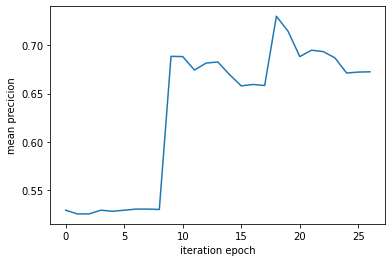

In [75]:
plt.plot(range(27), tree_res['mean_test_score'])
plt.ylabel('mean precicion')
plt.xlabel('iteration epoch')
None

In [76]:
get_f1_score(best_tree)

0.7387156360280092

Не слишком значительно, но приподняли скор после достаточно быстрого тюнинга)

***Погоняем лес***

In [78]:
params = {'n_estimators': [250, 500, 1000]}
best_forest, forest_results = get_results(RandomForestClassifier(), params)

In [79]:
forest_results.sort_values(by='rank_test_score').head()

,params,mean_test_score,rank_test_score
2,{'n_estimators': 1000},0.792854,1
1,{'n_estimators': 500},0.792754,2
0,{'n_estimators': 250},0.788496,3


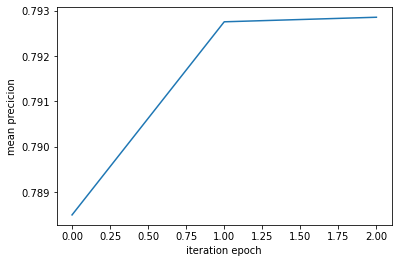

In [81]:
plt.plot(range(3), forest_results['mean_test_score'])
plt.ylabel('mean precicion')
plt.xlabel('iteration epoch')
None

In [82]:
get_f1_score(best_forest)

0.8162898372109738

In [83]:
results.head()

,log_reg,ridge,knn,tree,forest,boosting
accuracy,0.452442,0.650386,0.434447,0.732648,0.789203,0.784062
precision,0.198507,0.613794,0.326083,0.713236,0.860020,0.839313
recall,0.261199,0.549969,0.349402,0.772719,0.808183,0.774123
f1,0.225216,0.569895,0.336790,0.737818,0.831583,0.802090


Скор ухудшился в сравнении с дефолтными параметрами (я тюнил не так много, так как, насколько я знаю, в RandomForest'е бессмысленно пытаться бороться с переобучением отдельных деревьев)

Зато он гораздо лучше на тесте, нежели на трейне!

Думаю, это знак того, что результаты можно улучшить)

Не стал трогать бустинг, чтобы особо не читерить))

Считаю подъем качества приемлемым, хотя я и сделал работу достаточно поверхностно)

Спасибо за Вашу работу! Хорошего дня)

![](https://cq-esports.com/storage/uploads/images/1079876/1613738343502.png)